In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train_df=pd.read_csv('../data/train.csv')
test_df=pd.read_csv('../data/test.csv')
train_df.shape,test_df.shape

((891, 12), (418, 11))

In [9]:
train_df.columns[np.logical_not(train_df.columns.isin(test_df.columns))]

Index(['Survived'], dtype='object')

In [10]:
test_df['Survived']=np.nan

In [15]:
combined=pd.concat((train_df,test_df))

In [54]:
combined.apply(lambda x:np.sum(pd.isnull(x), axis=0))
combined['Title']=combined.Name.str.extract('(\w+)\.',expand=False)
combined['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})
rare_title=combined['Title'].value_counts().index[(combined['Title'].value_counts()<10)]
rare_title=rare_title.tolist()
combined['Title']=combined['Title'].replace(rare_title,'Rare')

In [57]:
train_df=combined.iloc[:891]
test_df=combined.iloc[892:]

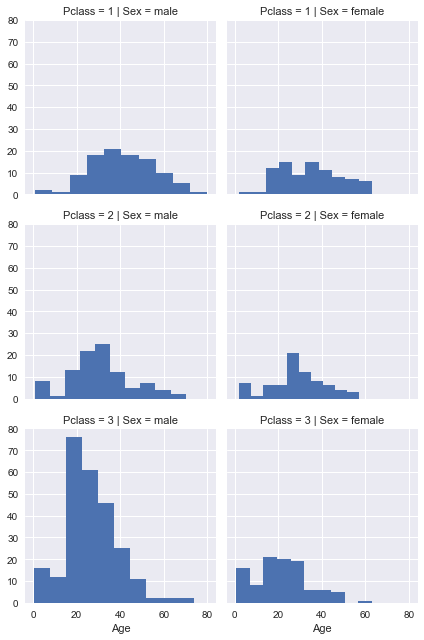

In [63]:
grid=sns.FacetGrid(train_df,row='Pclass',col='Sex')
grid.map(plt.hist,'Age')

In [64]:
combined['Age_band']=pd.cut(combined['Age'],5)